In [31]:
############### SESYNC Research Support: Urban green planning ########## 
## Testing optimization.
## 
##
## DATE CREATED: 11/15/2018
## DATE MODIFIED: 11/16/2018
## AUTHORS: Benoit Parmentier  
## Version: 1
## PROJECT: Urban green infrastructure planning
## ISSUE: 
## TO DO:
##
## COMMIT: fixed gdal.Warp bug, reprojection to MD SRS
##

###################################################
#

###### Library used

import gdal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import subprocess
import pandas as pd
import os, glob
from rasterio import plot
import geopandas as gpd
import scipy
from math import cos

################ NOW FUNCTIONS  ###################

##------------------
# Functions used in the script 
##------------------

def create_dir_and_check_existence(path):
    #Create a new directory
    try:
        os.makedirs(path)
    except:
        print ("directory already exists")

############################################################################
#####  Parameters and argument set up ########### 

#ARGS 1
in_dir = "/nfs/bparmentier-data/Data/projects/urban_green_planning/GAstart"
#in_dir <- "/nfs/tjovanovic-data/Data/Baltimore/Hydrology/GAstart"
#ARGS 2
out_dir = "/nfs/bparmentier-data/Data/projects/urban_green_planning/outputs"
#ARGS 3:
create_out_dir=True #create a new ouput dir if TRUE
#ARGS 7
out_suffix = "processing_data_11082018" #output suffix for the files and ouptut folder
#ARGS 8
num_cores = 2 # number of cores
file_format = ".tif"

dem_baltimore_filename = "DEM_BaltArea_1m.tif"
lc_baltimore_filename = "landCover_area1m.tif"
reg_outline_filename = "watersheds8digit.shp"

################# START SCRIPT ###############################

######### PART 0: Set up the output dir ################

#set up the working directory
#Create output directory

if create_out_dir==True:
    #out_path<-"/data/project/layers/commons/data_workflow/output_data"
    out_dir = "output_data_"+out_suffix
    out_dir = os.path.join(in_dir,out_dir)
    create_dir_and_check_existence(out_dir)
    os.chdir(out_dir)        #set working directory
else:
    os.chdir(create_out_dir) #use working dir defined earlier

directory already exists


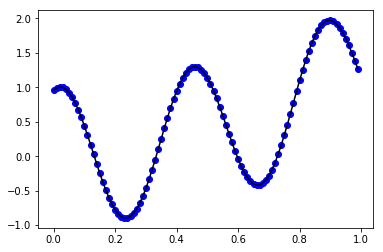

global minimum: x = -0.1951, f(x0) = -1.0009


In [32]:
#######################################
### PART 1: Read in DATA #######

#Wales, D J, and Doye J P K, Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones Clusters Containing up to 110 Atoms. Journal of Physical Chemistry A, 1997, 101, 5111.
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.basinhopping.html#r95
func = lambda x: cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]

def test_function(x):
    return cos(14.5 * x - 0.3) + (x + 0.2) * x
vecfunc = np.vectorize(test_function)

x = np.arange(0.0, 1, 0.01)
y = vecfunc(x)
plt.plot (x, y, 'bo', x, y, 'k')
plt.show()
    
minimizer_kwargs = {"method": "BFGS"}
ret = scipy.optimize.basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs,
              niter=200)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))


In [33]:
ret

                        fun: -1.0008761844426555
 lowest_optimization_result:       fun: -1.0008761844426555
 hess_inv: array([[0.00471235]])
      jac: array([1.59442425e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([-0.19506755])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4719
                        nit: 200
                       njev: 1573
                          x: array([-0.19506755])

In [34]:
x0

[1.0]

In [35]:
def func2d(x):
     f = cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] +
                                                         0.2) * x[0]
     df = np.zeros(2)
     df[0] = -14.5 * sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
     df[1] = 2. * x[1] + 0.2
     return f, df

In [36]:
x = np.arange(0.0, 1, 0.01)
fun_2d = np.vectorize(func2d)
z=fun_2d(x)
plt.plot (x, y, 'bo', x, y, 'k')
plt.show()

#https://ipython-books.github.io/92-minimizing-a-mathematical-function/
    

IndexError: invalid index to scalar variable.

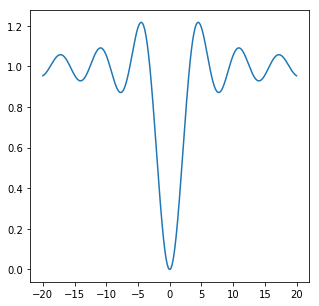

In [38]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

#https://ipython-books.github.io/92-minimizing-a-mathematical-function/
    
def f(x):
    return 1 - np.sin(x) / x

x = np.linspace(-20., 20., 1000)
y = f(x)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

(-20, 20)

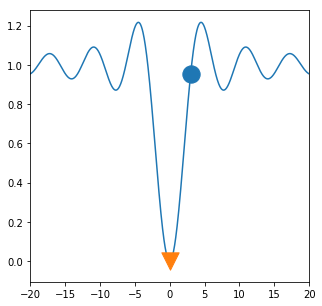

In [40]:
x0 = 3
xmin = opt.minimize(f, x0).x

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

(-20, 20)

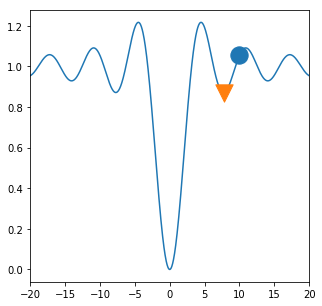

In [42]:
#Problem in case we use an initial estimate that is far from the global: it is stuck
#in a local minimum
x0 = 10
xmin = opt.minimize(f, x0).x
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

(-20, 20)

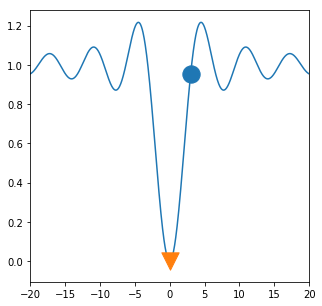

In [41]:
# We use 1000 iterations.
xmin = opt.basinhopping(f, x0, 1000).x
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)



In [43]:
#now let's try two D
def g(X):
    # X is a 2*N matrix, each column contains
    # x and y coordinates.
    x, y = X
    return (np.sin(3*np.pi*x)**2 +
            (x-1)**2 * (1 + np.sin(3*np.pi*y)**2) +
            (y-1)**2 * (1 + np.sin(2*np.pi*y)**2))

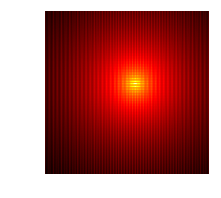

In [44]:
n = 500
k = 10
X, Y = np.mgrid[-k:k:n * 1j,
                -k:k:n * 1j]
Z = g(np.vstack((X.ravel(), Y.ravel()))).reshape(n, n)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# We use a logarithmic scale for the color here.
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.set_axis_off()

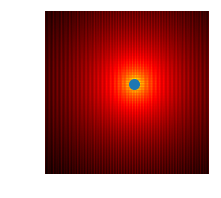

In [45]:
# We use the Powell method.
x0, y0 = opt.minimize(g, (8, 3),
                      method='Powell').x
x0, y0
(1.000, 1.000)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.scatter(x0, y0, s=100)
ax.set_axis_off()

#https://ipython-books.github.io/92-minimizing-a-mathematical-function/
    